# Making Simple Plots

## Objectives
+ Learn how to make a simple 1D plot in Python.
+ Learn how to find the maximum/minimum of a function in Python.

We will use [Problem 4.B.2](https://youtu.be/w-IGNU2i3F8) of the lecturebook as a motivating example.
We find that the moment of the force $\vec{F}$ about point A is:
$$
\vec{M_A} = (bF\cos\theta - dF\sin\theta)\hat{k}.
$$
Let's plot the component of the moment as a function of $\theta$.
For this, we will use the Python module [matplotlib](https://matplotlib.org).

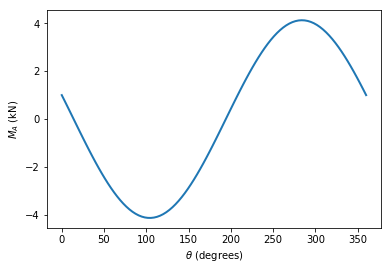

In [1]:
import numpy as np # for numerical algebra
import matplotlib.pyplot as plt # this is where the plotting capabilities are
# The following line is need so that the plots are embedded in the Jupyter notebook (remove when not using Jupyter)
%matplotlib inline 

# Define a function that computes the moment magnitude as a function of all other parameters
def M_A(theta, b, d, F):
    """
    Compute the k component of the moment of F about point A given all the problem parameters.
    """
    return b * F * np.cos(theta) - d * F * np.sin(theta)

# Choose some parameters
b = 0.5 # In meters
d = 2. # In meters
F = 2. # In kN
# The thetas on which we will evaluate the moment for plotting
thetas = np.linspace(0, 2 * np.pi, 100)
# The moment on these thetas:
M_As = M_A(thetas, b, d, F)
# Let's plot
plt.plot(thetas / (2. * np.pi) * 360, M_As, lw=2)
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('$M_A$ (kN)');

Now, let's put two lines in the same plot.
Let's compare the moments when we change $d$ from 2 meters to 3.5 meters.

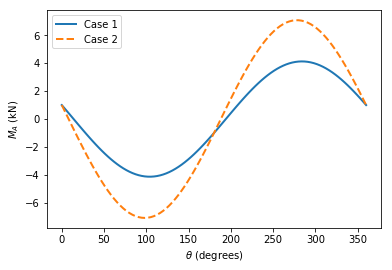

In [2]:
# We already have M_A for d=2 m (and all other paramters to whichever values we gave them)
# Let's copy it:
M_As_case_1 = M_As
# And let's compute it again for d=3.5 m
d = 3.5 # In m
M_As_case_2 = M_A(thetas, b, d, F)
# Let's plot both of them in the same figure
plt.plot(thetas / (2. * np.pi) * 360, M_As_case_1, lw=2, label='Case 1')
plt.plot(thetas / (2. * np.pi) * 360, M_As_case_2, '--', lw=2, label='Case 2')
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('$M_A$ (kN)')
plt.legend(loc='best')

Finally, let's see how we can make interactive plots.
We will use the Python module [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) and in particular the function [ipywidgets.interact](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html).

In [3]:
from ipywidgets import interact # Loading the module
# Interact needs a function that does the plotting given the parameters.
# Let's make it:
def make_plots(b=0.5, d=3., F=1.): # X=val defines default values for the function
    """
    Make the plot.
    """
    thetas = np.linspace(0, 2. * np.pi, 100)
    M_As = M_A(thetas, b, d, F)
    plt.plot(thetas / (2. * np.pi) * 360, M_As, lw=2, label='Case 1')
    plt.ylim([-10., 10.])
    plt.xlabel(r'$\theta$ (degrees)')
    plt.ylabel('$M_A$ (kN)')

Let's just check that the function works by calling it a few times:

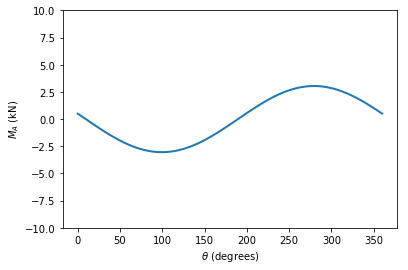

In [4]:
# With no inputs it should use the default values
make_plots()

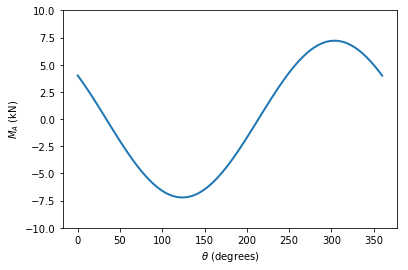

In [5]:
# You can specify all the inputs like this:
make_plots(2., 3., 2.)

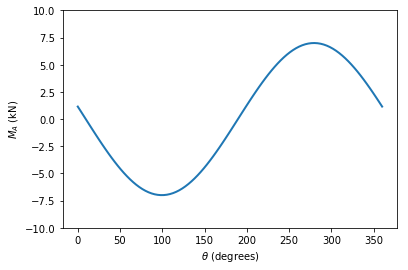

In [6]:
# Or even by name (whatever is not specified gets the default value):
make_plots(F=2.3)

Ok. Let's use interact now:

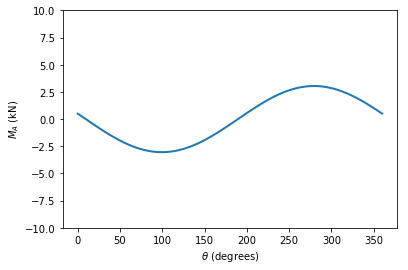

In [7]:
interact(make_plots, 
         b=(0., 5., 0.1), # Range for b: (min, max, increment)
         d=(0., 5, 0.1),  # Range for d
         F=(0., 2, 0.1)   # Range for F
        );